In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# df = pd.read_csv('univariate_linear_regression.csv')
# df.iloc[:,-1]
# df.iloc[:,:-1]

df2 = pd.read_csv("mobile_data.csv")
df3 = df2.iloc[:,[1,11]]
df3['Pixel Density'] = df3['Pixel Density']/max(df3['Pixel Density'])

C:\Users\vansh\AppData\Local\Temp\ipykernel_18336\2677991559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Pixel Density'] = df3['Pixel Density']/max(df3['Pixel Density'])


FINAL Ws = [3.7539611  0.53292118]
The grad of the cost function after the optimization has reached less than 1e-5
The slope = 0.532921180740281
The intercept = 3.7539611025417154
Mean Squared Error (MSE) for this model = 0.06757037785111608


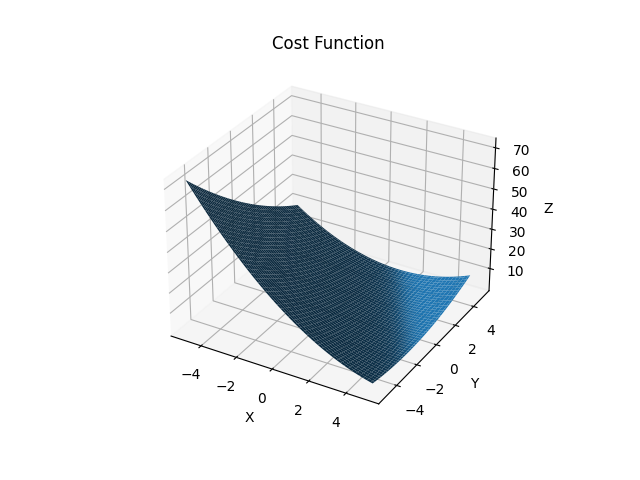

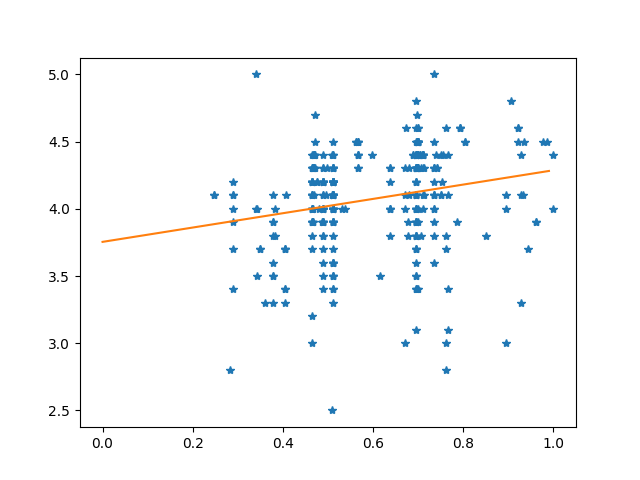

In [6]:
class MultivariateLinearRegression:
    def __init__(self,dataframe,initial_weights):
        
        self.is_model_ready = False
        self.x_train_df = dataframe.iloc[:,:-1]
        self.y_train_df = dataframe.iloc[:,-1]
        
        self.x_train = self.x_train_df.to_numpy()
        # print(f"self.x_train_df.to_numpy() = {self.x_train_df.to_numpy()}")
        self.y_train = self.y_train_df.to_numpy()
        # print(f"self.y_train_df.to_numpy() = {self.y_train_df.to_numpy()}")

        self.x_train = self.addDummy1ToList(x_train=self.x_train)

        # print(f"\nself.x_train = {self.x_train}\n")
        # print(f"self.y_train = {self.y_train}")


        # print(f"\nself.x_train.shape[0] = {self.x_train.shape[0]}\n\n")

        # print(f"self.x_train.shape[1] = {self.x_train.shape[1]}")



        if len(initial_weights) == self.x_train[0].shape[0]:
            self.weights = np.array(initial_weights)
        else:
            raise ValueError('The Dimensions of the weight is not as per the dataset.\nPlease restart with new dimension of weights')
        
    def h_w(self,weights,X):
        return np.dot(weights,X)
    
    def error(self,weights,X,y):
        return self.h_w(weights=weights,X=X) - y
    
    def J(self):
        J_list = []
        for i in range(self.x_train.shape[0]):
            J_list.append((self.h_w(weights=self.weights,X=self.x_train[i]) - self.y_train[i])**2)
        
        cost = sum(J_list)/(2*self.x_train.shape[0])
        return cost
    
    def J2(self,weights):
        J_list = []
        for i in range(self.x_train.shape[0]):
            # J_list.append((self.h_w(weights=weights,X=self.x_train[i]) - self.y_train[i])**2)
            J_list.append((weights[0]*self.x_train[i][0] + weights[1]*self.x_train[i][1] - self.y_train[i])**2)
        
        cost = sum(J_list)/(2*self.x_train.shape[0])
        return cost
    
    def gradJ(self):
        dJ_dw_list = []
        for i in range(self.weights.shape[0]):
            dJ_dwi = []
            for j in range(self.x_train.shape[0]):
                dJ_dwi.append((self.error(weights=self.weights,X=self.x_train[j],y=self.y_train[j])) * self.x_train[j][i])

            dJ_dw_list.append( sum(dJ_dwi) / self.x_train.shape[0] )

        return np.array(dJ_dw_list)
    
    def new_point(self,alpha):
        return self.weights - alpha*self.gradJ()
    
    def constant_alpha_optimization(self,alpha = 0.01):
        i=0

        # CHECK IF THIS IS DEEP COPY OR SHALLOW COPY

        while i<10000 and np.linalg.norm(self.gradJ()) > 1e-5:
            self.weights = self.new_point(alpha=alpha)
            # STARTING_POINT2 = self.new_point(alpha=alpha)
            i+=1



            # print(f"i = {i} \nnp.linalg.norm(self.gradJ()) = {np.linalg.norm(self.gradJ())}\nWeights = {self.weights}\n")




        print(f"FINAL Ws = {self.weights}")

        if i>=9999:
            print(f"The limit to the number of iteration has been reached.\n")
        elif np.linalg.norm(self.gradJ()) <= 1e-5:
            self.is_model_ready = True
            print(f"The grad of the cost function after the optimization has reached less than 1e-5")

    def FinalModel(self,X):
        '''
        Return the value of 'Y' as per the model for the given value of 'X'
        '''
        print(f"is_model_ready = {self.is_model_ready}")
        if self.is_model_ready:
            X = np.array(X)
            X = self.addDummy1ToList(x_train=X)
            return self.h_w(weights=self.weights,X=X)
        else:
            print("\nThe model is not yet made.\nPlease call the Class function constant_alpha_optimization() or any other method.\n")
        

    def setWeightsToZero(self):
        print(f"self.x_train[0].shape[0] = {self.x_train[0].shape[0]}")
        self.weights = np.zeros(self.x_train[0].shape[0])
        print(f"self.weights = {self.weights}")   
    
    def addDummy1ToList(self,x_train):
        '''
        x_train should be a numpy array
        '''
        # print(f"type(x_train[0]) = {type(x_train[0])}")
        if str(type(x_train[0])) == "<class 'numpy.float64'>":
            x_train2 = []
            for i in range(len(x_train)):
                x_train2.append(np.array([1,float(x_train[i])]))
            return np.array(x_train2)
        else:
            x_train2 = []
            for i in range(len(x_train)):

                x_train2.append(np.array([1,*list(x_train[i])]))

            return np.array(x_train2)
        
    def lin_reg_plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.x_train[:,1], self.y_train,'*')
        x = np.arange(0,1,0.01)
        y = self.weights[0] + self.weights[1] * x
        ax.plot(x,y)

    def plot3d(self):
        x = np.linspace(-5,5,100)
        y = np.linspace(-5,5,100)
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        X,Y = np.meshgrid(x,y)
        Z = self.J2(weights=np.array([X,Y]))
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("Cost Function")
        ax.plot_surface(X,Y,Z)
        plt.show()


model1 = MultivariateLinearRegression(dataframe=df3,initial_weights=[0.4,0.2])
model1.constant_alpha_optimization(alpha=0.1)
# What is the slope and intercept of the regression line, and what is the Mean Squared Error (MSE) for this model?
print(f"The slope = {model1.weights[1]}")
print(f"The intercept = {model1.weights[0]}")
print(f"Mean Squared Error (MSE) for this model = {model1.J()}")
model1.lin_reg_plot()
model1.plot3d()